/Users/tang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, units=128)`
/Users/tang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10)`


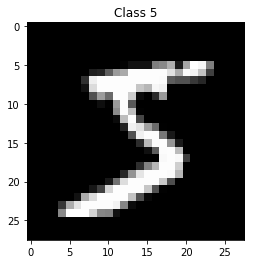

In [5]:
from matplotlib import pyplot as plt
% matplotlib inline

import numpy as np

np.random.seed(13)

from keras import backend as K
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
import os

num_classes = 10
input_unit_size = 28 * 28

# 普通全连接 model
# dense
#   |
#   V
#  relu
#   |
#   V
#  dense
#   |
#   V
#  softmax
denseModel = Sequential()
denseModel.add(Dense(output_dim=128, input_dim=input_unit_size))
denseModel.add(Activation("relu"))
# model.add(Conv2D())
denseModel.add(Dense(output_dim=num_classes))
denseModel.add(Activation("softmax"))
denseModel.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

currentPath = os.path.abspath('.')
(x_train, y_train), (x_test, y_test) = mnist.load_data(currentPath + "/data/mnist.npz")


plt.imshow(x_train[0], cmap='gray')
plt.title('Class ' + str(y_train[0]))


##归一化数据
x_train = x_train.reshape(x_train.shape[0], input_unit_size)
x_test = x_test.reshape(x_test.shape[0], input_unit_size)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


/Users/tang/anaconda3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 51000 samples, validate on 9000 samples
Epoch 1/20


 - 2s - loss: 0.3160 - acc: 0.9128 - val_loss: 0.1685 - val_acc: 0.9516


Epoch 2/20


 - 2s - loss: 0.1453 - acc: 0.9585 - val_loss: 0.1146 - val_acc: 0.9679


Epoch 3/20


 - 2s - loss: 0.1010 - acc: 0.9709 - val_loss: 0.1112 - val_acc: 0.9677


Epoch 4/20


 - 2s - loss: 0.0766 - acc: 0.9783 - val_loss: 0.0887 - val_acc: 0.9748


Epoch 5/20


 - 2s - loss: 0.0597 - acc: 0.9825 - val_loss: 0.0786 - val_acc: 0.9766


Epoch 6/20


 - 2s - loss: 0.0480 - acc: 0.9860 - val_loss: 0.0857 - val_acc: 0.9751


Epoch 7/20


 - 2s - loss: 0.0383 - acc: 0.9890 - val_loss: 0.0744 - val_acc: 0.9786


Epoch 8/20


 - 2s - loss: 0.0302 - acc: 0.9917 - val_loss: 0.0765 - val_acc: 0.9784


Epoch 9/20


 - 2s - loss: 0.0254 - acc: 0.9931 - val_loss: 0.0759 - val_acc: 0.9782


Epoch 10/20


 - 2s - loss: 0.0202 - acc: 0.9946 - val_loss: 0.0810 - val_acc: 0.9769


Epoch 11/20


 - 2s - loss: 0.0169 - acc: 0.9956 - val_loss: 0.0841 - val_acc: 0.9776


Epoch 12/20


 - 2s - loss: 0.0146 - acc: 0.9961 - val_loss: 0.0758 - val_acc: 0.9794


Epoch 13/20


 - 2s - loss: 0.0118 - acc: 0.9971 - val_loss: 0.0857 - val_acc: 0.9787


Epoch 14/20


 - 2s - loss: 0.0103 - acc: 0.9976 - val_loss: 0.0797 - val_acc: 0.9783


Epoch 15/20


 - 2s - loss: 0.0085 - acc: 0.9980 - val_loss: 0.0919 - val_acc: 0.9763


Epoch 16/20


 - 2s - loss: 0.0078 - acc: 0.9980 - val_loss: 0.0875 - val_acc: 0.9788


Epoch 17/20


 - 2s - loss: 0.0087 - acc: 0.9976 - val_loss: 0.0829 - val_acc: 0.9796


Epoch 18/20


 - 2s - loss: 0.0051 - acc: 0.9988 - val_loss: 0.0889 - val_acc: 0.9791


Epoch 19/20


 - 2s - loss: 0.0039 - acc: 0.9993 - val_loss: 0.0958 - val_acc: 0.9776


Epoch 20/20


 - 2s - loss: 0.0071 - acc: 0.9981 - val_loss: 0.0940 - val_acc: 0.9796


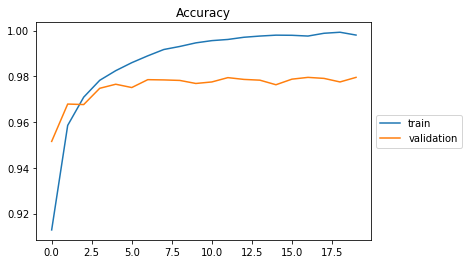

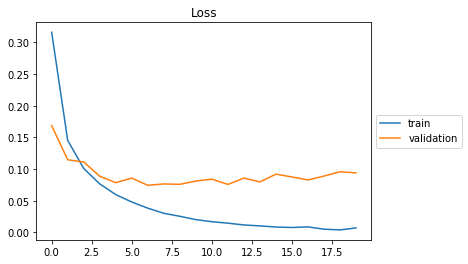

In [6]:
# one-hot representation
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# 打印模型结构
denseModel.summary()

denseResult = denseModel.fit(x_train, y_train,
                             nb_epoch=20, batch_size=64,
                             verbose=2, validation_split=0.15)

### dense model graph
x = range(20)
plt.plot(x, denseResult.history['acc'], label='train')
plt.plot(x, denseResult.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, denseResult.history['loss'], label='train')
plt.plot(x, denseResult.history['val_loss'], label='validation')
plt.title('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 27, 27, 64)        320       
_________________________________________________________________
activation_22 (Activation)   (None, 27, 27, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 128)       32896     
_________________________________________________________________
activation_23 (Activation)   (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 256)       131328    
_________________________________________________________________
activation_24 (Activation)   (None, 11, 11, 256)       0         
__________

/Users/tang/anaconda3/lib/python3.6/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 51000 samples, validate on 9000 samples
Epoch 1/10


 - 139s - loss: 0.1307 - acc: 0.9594 - val_loss: 0.0533 - val_acc: 0.9856


Epoch 2/10


 - 132s - loss: 0.0418 - acc: 0.9863 - val_loss: 0.0410 - val_acc: 0.9882


Epoch 3/10


 - 158s - loss: 0.0297 - acc: 0.9904 - val_loss: 0.0362 - val_acc: 0.9893


Epoch 4/10


 - 202s - loss: 0.0205 - acc: 0.9933 - val_loss: 0.0401 - val_acc: 0.9887


Epoch 5/10


 - 137s - loss: 0.0151 - acc: 0.9954 - val_loss: 0.0412 - val_acc: 0.9894


Epoch 6/10


 - 132s - loss: 0.0146 - acc: 0.9951 - val_loss: 0.0401 - val_acc: 0.9890


Epoch 7/10


 - 133s - loss: 0.0104 - acc: 0.9963 - val_loss: 0.0383 - val_acc: 0.9909


Epoch 8/10


 - 137s - loss: 0.0100 - acc: 0.9968 - val_loss: 0.0396 - val_acc: 0.9912


Epoch 9/10


 - 134s - loss: 0.0084 - acc: 0.9973 - val_loss: 0.0436 - val_acc: 0.9902


Epoch 10/10


 - 147s - loss: 0.0075 - acc: 0.9978 - val_loss: 0.0474 - val_acc: 0.9892


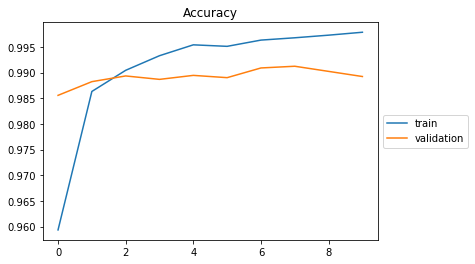

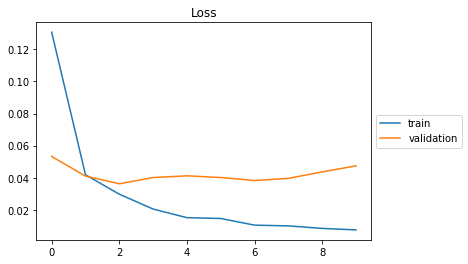

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(currentPath + "/data/mnist.npz")

##归一化数据
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# one-hot representation
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
#### cnn model 
# 28*28*1->28*28*64->14*14*64->7*7*256--->512-->dropOut->10
# conv2D
#   |
#   V
#  pool
#   |
#   V
#  relu
#   |
#   V
#  Dense
#   |
#   V
#  softMax
cnnModel = Sequential()
cnnModel.add(Conv2D(64, (2, 2), input_shape=(28, 28, 1)))
cnnModel.add(Activation("relu"))
cnnModel.add(MaxPooling2D(pool_size=(2, 2)))

# BatchNormalization(axis=-1)
cnnModel.add(Conv2D(128, (2, 2)))
cnnModel.add(Activation('relu'))
# BatchNormalization(axis=-1)
cnnModel.add(Conv2D(256, (2, 2)))
cnnModel.add(Activation('relu'))
cnnModel.add(MaxPooling2D(pool_size=(2, 2)))

# fully layer
cnnModel.add(Flatten())

cnnModel.add(Dense(512))
cnnModel.add(Dropout(0.1))
cnnModel.add(Activation('relu'))
# BatchNormalization()
cnnModel.add(Dense(num_classes))
cnnModel.add(Activation("softmax"))
cnnModel.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

# 打印模型结构
cnnModel.summary()

cnnResult = cnnModel.fit(x_train, y_train,
                         nb_epoch=10, batch_size=64,
                         verbose=2, validation_split=0.15)

### cnn model graph

x = range(10)
plt.plot(x, cnnResult.history['acc'], label='train')
plt.plot(x, cnnResult.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, cnnResult.history['loss'], label='train')
plt.plot(x, cnnResult.history['val_loss'], label='validation')
plt.title('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
